In [4]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import numpy as np
import shapely

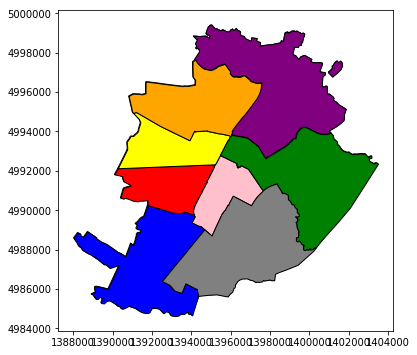

In [415]:
df_circ = geopandas.read_file('../SHP_files/circoscrizioni_geo/circoscrizioni_geo.shx')
df_cap = geopandas.read_file('../SHP_files/CAP_Torino/CAP_Torino.shp')
#df_circ=df_circ.set_index('NCIRCO').sort_index()
df_circ.crs={'init':'epsg:3003'}
df_circ['zip_codes']=[[21,22,23,24,28,29],[35,36,37],[38,39,41,42],[43,44,45,46],[48,47,49,51],[56,54,55],[32,53,52],[33,31,26,25,27,34]]
df_circ.zip_codes=df_circ.zip_codes.apply(lambda x : ['IT:101'+str(e) for e in x])

if True:
    fig,ax=plt.subplots(figsize=(6,6))
    df_circ.plot(ax=ax,color=(0,0,0,0),edgecolor='k')
    df_circ[df_circ.NCIRCO==1].plot(ax=ax,color='pink',edgecolor='k') #21,22,23,24,28,29
    df_circ[df_circ.NCIRCO==2].plot(ax=ax,color='blue',edgecolor='k') #35,36,37
    df_circ[df_circ.NCIRCO==3].plot(ax=ax,color='red',edgecolor='k') #38,39,41,42
    df_circ[df_circ.NCIRCO==4].plot(ax=ax,color='yellow',edgecolor='k') #43,44,45,46
    df_circ[df_circ.NCIRCO==5].plot(ax=ax,color='orange',edgecolor='k') #48,47,49,51
    df_circ[df_circ.NCIRCO==6].plot(ax=ax,color='purple',edgecolor='k') #56,54,55
    df_circ[df_circ.NCIRCO==7].plot(ax=ax,color='green',edgecolor='k') #32,53,52
    df_circ[df_circ.NCIRCO==8].plot(ax=ax,color='gray',edgecolor='k') #33,31,26,25,27,34
    #plt.savefig('CCF_2010.png')

In [460]:
# CENSUS
# df_cap: CAP dataframe with the geometry (and estimations of population from 2009).
# df_census_families : dataframe from the ufficio de statistica with families typologies
# 

# FB
# df_circ_fb : circoscrizione and their geometries (correspondences with ZIPs), and couples with kids (from fb)
# df_zip_fb : ZIP codes and their geometry, single men and women and married couples per zip
# df_zip_pop : pop by age range and by ZIP code
# df_circ_agebins : pop by age range per circ
# df_circ_gender : pop by gender per circ
# df_circ_single : single pop per circ
# df_circ_allparents : all parents per circ
# df_circ_parents_gender : parents in couple per gender and per circ

In [16]:
df_circ_fb=pd.read_pickle('df_circ_fb.pkl')
df_zip_fb=pd.read_pickle('df_zip_fb.pkl')
df_zip_pop=pd.read_pickle('df_zip_pop.pkl')
df_census_families=pd.read_pickle('df_census_families.pkl')
dict_CAP_to_poly=df_cap[['CAP','geometry']].set_index('CAP').to_dict()['geometry']
df_circ_agebins=pd.read_pickle('df_circ_agebins.pkl')
df_circ_gender=pd.read_pickle('df_circ_gender.pkl')
df_circ_single=pd.read_pickle('df_circ_single.pkl')
df_circ_allparents=pd.read_pickle('df_circ_allparents.pkl') # =sum of the two rows of df_circ_parents_gender. Oof!
df_circ_parents_gender=pd.read_pickle('df_circ_parents_gender.pkl')
df_circ_marriedparents_gender=pd.read_pickle('df_circ_marriedparents_gender.pkl') # Same as df_circ_parents_gender
df_circ_gender_census=pd.read_pickle('df_circ_gender_census.pkl')
df_zip_gender_shopping=pd.read_pickle('df_zip_gender_shopping.pkl')
df_agebin_theater=pd.read_pickle('df_zip_agebin_theater.pkl')
df_circ_agebins_complete.to_pickle('df_circ_agebins_complete.pkl')

df_circ_students_gender=pd.read_pickle('df_circ_students_gender.pkl')

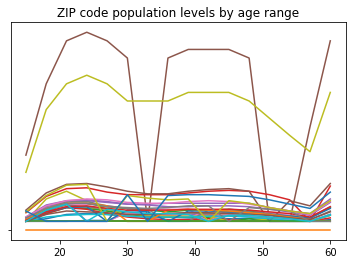

In [17]:
plt.figure()
for col in df_zip_pop:
    plt.plot([e[0] for e in df_zip_pop.index.tolist()], df_zip_pop[col].tolist())
#plt.yscale('log')
plt.title('ZIP code population levels by age range')
plt.show()

In [675]:
# next step: extract gender by ZS -> agglomerate by ZS to form ZIPs -> compare with fb

# done: comparing couples with kids per circoscrizione.
# done: comparing the age range by ZIP -> df_zip_pop + df_circ + data from census (Bad Query)
# done: compare the single men and women per circ -> df_zip_fb et df_census_families (Bad Query)

In [58]:
df_age_circ=pd.read_pickle('../data_ngh/age_gender_territ/df_age_circ.pkl')

In [307]:
df_age_circ

,1,2,3,4,5,6,7,8,Totale,age
age,,,,,,,,,,
0,421.0,740.0,796.0,623.0,868.0,790.0,561.0,797.0,5596,0
1,554.0,835.0,910.0,763.0,1022.0,943.0,674.0,912.0,6613,1
2,530.0,897.0,873.0,723.0,1067.0,945.0,683.0,871.0,6589,2
3,572.0,942.0,928.0,784.0,995.0,976.0,693.0,959.0,6849,3
4,586.0,903.0,949.0,751.0,1088.0,1024.0,736.0,961.0,6998,4
5,576.0,959.0,947.0,759.0,1037.0,999.0,731.0,1032.0,7040,5
6,598.0,1034.0,974.0,765.0,1093.0,1015.0,726.0,976.0,7181,6
7,627.0,1028.0,998.0,831.0,1087.0,1031.0,752.0,987.0,7341,7
8,606.0,1022.0,1035.0,816.0,1119.0,1029.0,785.0,988.0,7400,8


In [308]:
df_zip_pop

,,10121,10122,10123,10124,10125,10126,10127,10128,10129,10131,...,10145,10146,10147,10148,10149,10151,10152,10153,10154,10155
15,20,1000,1000,1000,1000,1000,8700,1300,1000,1000,1000,...,1000,1100,1500,1000,1500,1400,2100,1000,2200,0
18,23,1300,2000,1900,1900,2200,17000,2500,2200,3600,1000,...,1000,2100,2900,1800,2800,2500,4000,2300,1000,0
21,26,1800,2700,2600,2600,3200,22000,3000,2900,4500,1000,...,1000,2700,3400,2200,3400,3100,5200,3000,1000,0
24,29,1900,2700,2500,2400,1000,23000,3000,2700,3400,1000,...,1000,2800,3500,2100,3600,3100,5300,1000,1000,0
27,32,1800,2200,2200,1900,1000,22000,2800,2400,2400,1000,...,1000,2500,3300,2000,3500,2700,1000,2400,1000,0
30,35,1600,1900,1800,1500,2100,20000,2500,2000,1900,1000,...,1000,2300,3000,1800,3200,2600,4000,2100,4100,0
33,38,1500,1800,1600,1300,1900,1000,2400,1800,1700,1000,...,1000,2300,3000,1800,3100,2500,3700,1900,1000,0
36,41,1500,1700,1500,1200,1800,20000,2400,1900,1600,1000,...,1000,2300,3100,1900,3100,2600,3500,1900,4000,0
39,44,1400,1800,1500,1200,1800,21000,2400,2000,1600,1000,...,1000,2400,3100,2000,3300,2800,3600,1800,4100,0
42,47,1400,1800,1400,1300,1700,21000,1000,1900,1600,1000,...,1000,2400,3100,2000,3400,2800,1000,1000,4100,0


In [59]:
A=df_age_circ.reset_index().age[:-1].apply(lambda x : int(x)).tolist()
A.append(250)
df_age_circ['age']=A

In [1051]:
#age_ranges=df_zip_pop.index.tolist()
age_ranges=df_circ_agebins.index.tolist()
age_ranges.append((63,66))

In [1052]:
df_age_circ_ranges=df_age_circ[[15<=a<=65 for a in df_age_circ.age]]
df_age_circ_ranges['bin']=df_age_circ[[15<=a<=66 for a in df_age_circ.age]].age[0:-1].apply(lambda x : max(set((age_ranges[max(1,x//3-5)-1],age_ranges[min(((x+3)//3-5),17)-1]))))
df_age_circ_ranges.drop('Totale ',axis=1,inplace=True)

/opt/anaconda/miniconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/eartiges/.local/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [1053]:
# OBSOLETE
if False:
    df_age_circ_ranges=df_age_circ[[15<=a<=65 for a in df_age_circ.age]]
    df_age_circ_ranges['bin']=df_age_circ[[15<=a<=66 for a in df_age_circ.age]].age[0:-1].apply(lambda x : set((age_ranges[max(1,x//3-5)-1],age_ranges[min(((x+3)//3-5),16)-1])))
    df_age_circ_ranges.drop('Totale ',axis=1,inplace=True)

In [1054]:
# How to make a df_census_cric without overlapping bins.
df_census_circ=pd.DataFrame(index=sorted(list(set([e[0] for e in df_age_circ_ranges.bin.tolist()]))), columns=df_age_circ_ranges.columns)
for agebin in (df_census_circ.index):
    df_census_circ.loc[agebin]=df_age_circ_ranges[df_age_circ_ranges.bin==(agebin,agebin+3)].sum()
df_census_circ.drop(['bin','age'],axis=1,inplace=True)
df_census_circ['bin']=df_census_circ.reset_index().set_index(df_census_circ.index)['index'].apply(lambda x : (x,x+3))
df_census_circ.set_index('bin',inplace=True)

In [844]:
# Make one WITH overlapping bins
df_census_circ=pd.DataFrame(index=df_zip_pop.index, columns=df_age_circ_ranges.columns)
for agebin in (df_zip_circ.index):
    df_census_circ.loc[agebin]=df_age_circ_ranges[[agebin in i for i in df_age_circ_ranges.bin]].sum()
df_census_circ.drop(['bin','age'],axis=1,inplace=True)

NameError: name 'df_zip_circ' is not defined

In [210]:
df_capcirc=df_cap[['CAP','geometry']]

In [211]:
def get_ratio(zip_poly,list_circ):
    dict_ratios={}
    for i,poly_circ in enumerate(list_circ):
        dict_ratios[i]=zip_poly.intersection(poly_circ).area / zip_poly.area
    return dict_ratios

In [212]:
df_capcirc['dict_circ']=df_capcirc.geometry.apply(lambda x : get_ratio(x,df_circ.to_crs(epsg=4326).geometry.tolist()))

/opt/anaconda/miniconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [246]:
df_fb_circ=pd.DataFrame(index=df_zip_pop.index, columns=df_circ.index,data=0)
df_fb_circ

,NCIRCO,1,2,3,4,5,6,7,8
15,20,0,0,0,0,0,0,0,0
18,23,0,0,0,0,0,0,0,0
21,26,0,0,0,0,0,0,0,0
24,29,0,0,0,0,0,0,0,0
27,32,0,0,0,0,0,0,0,0
30,35,0,0,0,0,0,0,0,0
33,38,0,0,0,0,0,0,0,0
36,41,0,0,0,0,0,0,0,0
39,44,0,0,0,0,0,0,0,0
42,47,0,0,0,0,0,0,0,0


In [231]:
dict_ratios=df_capcirc.loc[df_capcirc.CAP=='10151']['dict_circ'][0]

In [236]:
df_capcirc

,CAP,geometry,dict_circ
0,10151,"POLYGON ((7.625510014772632 45.11358001598873,...","{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.1657914798560153..."
1,10155,"POLYGON ((7.70531702886528 45.11016816267809, ...","{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.06085680..."
2,10154,"POLYGON ((7.70531702886528 45.11016816267809, ...","{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0...."
3,10152,"POLYGON ((7.690760014342415 45.08784998465323,...","{0: 0.00019407569355824966, 1: 0.0, 2: 0.0, 3:..."
4,10149,"POLYGON ((7.662630013568619 45.10345998476326,...","{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0948363565906286..."
5,10148,"POLYGON ((7.653330018343588 45.12449998156886,...","{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.91990432..."
6,10147,"POLYGON ((7.690880013578741 45.10374998464141,...","{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 1.0, 5: 0...."
7,10146,"POLYGON ((7.641700014638977 45.08470998470082,...","{0: 0.0, 1: 0.0, 2: 0.012242432140788106, 3: 0..."
8,10145,"POLYGON ((7.643339078500147 45.07555670217369,...","{0: 0.0, 1: 0.0, 2: 0.0007273399819106855, 3: ..."
9,10144,"POLYGON ((7.677755384325471 45.0895161639728, ...","{0: 0.003840088906258215, 1: 0.0, 2: 0.0, 3: 0..."


In [267]:
df_capcirc.loc[df_capcirc.CAP==CAP]['dict_circ'].values

array([{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.060856809395205255, 5: 0.9390056421998351, 6: 0.00013754840495582476, 7: 0.0}],
      dtype=object)

In [277]:
CAP

'10155'

In [284]:
df_zip_pop.replace('',0,inplace=True)

In [286]:
for CAP in df_capcirc['CAP']:
    try:
        print(CAP,type(CAP))
        dict_ratios=df_capcirc.loc[df_capcirc.CAP==CAP]['dict_circ'].values[0]
        for k in dict_ratios.keys():
            df_fb_circ[k+1]+=dict_ratios[k]*df_zip_pop[CAP]
    except KeyError:
        pass

10151 <class 'str'>
10155 <class 'str'>
10154 <class 'str'>
10152 <class 'str'>
10149 <class 'str'>
10148 <class 'str'>
10147 <class 'str'>
10146 <class 'str'>
10145 <class 'str'>
10144 <class 'str'>
10143 <class 'str'>
10142 <class 'str'>
10141 <class 'str'>
10139 <class 'str'>
10138 <class 'str'>
10137 <class 'str'>
10136 <class 'str'>
10134 <class 'str'>
10133 <class 'str'>
10132 <class 'str'>
10131 <class 'str'>
10129 <class 'str'>
10128 <class 'str'>
10127 <class 'str'>
10126 <class 'str'>
10124 <class 'str'>
10123 <class 'str'>
10122 <class 'str'>
10121 <class 'str'>
10156 <class 'str'>
10153 <class 'str'>
10125 <class 'str'>
10135 <class 'str'>


In [287]:
df_fb_circ

,NCIRCO,1,2,3,4,5,6,7,8
15,20,11080.197239,11214.070820,19647.440799,10190.930765,14717.225690,3675.470853,9754.409701,24690.117139
18,23,23685.594386,21835.907898,37948.760489,17867.908288,26994.690614,1920.196051,15260.423242,45505.400051
21,26,31368.561536,26882.241683,45971.625642,21843.741590,32891.556157,1995.848308,19055.655372,57934.078032
24,29,28698.023014,27281.635204,47928.601129,22258.344899,33287.929725,1981.877351,17263.449930,57933.306749
27,32,24053.841596,25075.173147,44786.819667,17584.652075,30220.246742,1923.360570,9604.801023,55121.577425
30,35,20317.145492,22910.822459,41803.654534,15833.046389,28452.515048,6832.905099,15940.433268,51411.754575
33,38,18146.207462,21884.071592,40968.805902,15352.614174,27737.490568,1917.303202,13662.202472,13245.319942
36,41,18028.777606,21338.530375,38147.162309,16029.156701,28415.682754,6685.358352,14432.122335,50534.061520
39,44,18308.900164,22289.746419,40104.153580,18830.521191,30177.209379,6860.774758,14579.782984,52742.799655
42,47,17997.185188,22041.558877,41301.679151,18652.410953,30357.793068,6835.049985,8700.498707,50916.321832


In [289]:
df_census_circ

,,1,2,3,4,5,6,7,8
15,20,4010,6818,5776,4530,6318,5907,4151,6130
18,23,4084,6956,6158,4633,6586,6105,4364,6423
21,26,4320,7193,6606,5113,6894,6259,4749,6847
24,29,5133,7740,7500,5996,7443,6587,5419,7737
27,32,5782,8176,8462,6741,7970,6862,6067,8532
30,35,6022,8392,9007,7142,8373,7030,6585,8803
33,38,6000,8543,9286,7385,8882,7461,6829,9048
36,41,6075,8967,9628,7807,9634,8204,7054,9471
39,44,6674,10434,10635,8700,10807,9171,7633,10312
42,47,7442,12017,11794,9529,11749,9786,8167,11606


In [420]:
df_circ_agebins

,NCIRCO,1,2,3,4,5,6,7,8
15,18,1400,2500,2500,1500,2300,1700,1700,6700
18,21,5800,6500,7600,4200,6000,1000,5200,19000
21,24,9800,8700,11000,5800,1000,5600,7700,27000
24,27,9200,9100,11000,6300,8200,6100,8000,1000
27,30,7700,8700,11000,1000,7800,5400,6900,28000
30,33,6400,7900,9200,5300,7100,4900,5900,25000
33,36,5700,7500,8500,4900,6900,4700,5300,24000
36,39,5500,7300,8600,4900,7100,4700,4900,24000
39,42,5400,1000,8700,4900,7200,4600,4900,25000
42,45,1000,1000,9200,1000,7700,4900,1000,26000


# Age bin per circ - FB vs census

Querying per ZIP code makes us overestimate the population size. We still find highly variable data, i.e not really continuous

In [591]:
df_fb_circ.max().max()

57934.07803195829

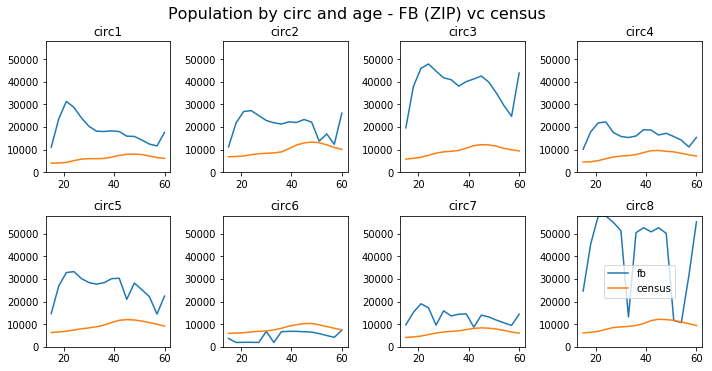

In [592]:
MAX=max(df_fb_circ.max().max(), df_census_circ.max().max())
fig,ax=plt.subplots(2,4,figsize=(10,5))
fig.suptitle('Population by circ and age - FB (ZIP) vc census',fontsize=16,va='bottom')
for col in df_circ_agebins.columns:
    ax[(col-1)//4,(col-1)%4].plot([e[0] for e in df_fb_circ.index.values],df_fb_circ[col].values)
    ax[(col-1)//4,(col-1)%4].plot([e[0] for e in df_census_circ.index.values],df_census_circ[str(col)].values)
    ax[(col-1)//4,(col-1)%4].set_title('circ'+str(col))
    ax[(col-1)//4,(col-1)%4].set_ylim([0, MAX])
plt.legend(['fb','census'])
plt.tight_layout()
plt.savefig('Pop_age_fbZIP_vs_censuscirc.pdf')
plt.show()

Querying per Circ is more accurate. Except for Circ 8, I don't know what happened to the API. Why do we always have so many gaps?

In [722]:
df_circ_agebins-df_circ_agebins2

,NCIRCO,1,2,3,4,5,6,7,8
15,18,300,600,-2400,300,500,400,400,4600
18,21,400,800,-8400,400,700,-2900,500,11900
21,24,400,600,-13000,300,-6200,500,400,16000
24,27,500,700,-15000,400,600,600,500,0
27,30,6700,500,-14000,-4600,500,4400,400,27000
30,33,200,400,-13800,300,300,300,300,15300
33,36,200,400,-13500,200,300,300,300,15100
36,39,200,400,-13400,200,300,200,200,15300
39,42,300,-5900,-14300,300,300,200,200,16200
42,45,-4300,-6600,-14800,-3800,500,200,-3700,16700


In [717]:
df_circ_agebins2=pd.read_pickle('df_circ_agebins2.pkl')

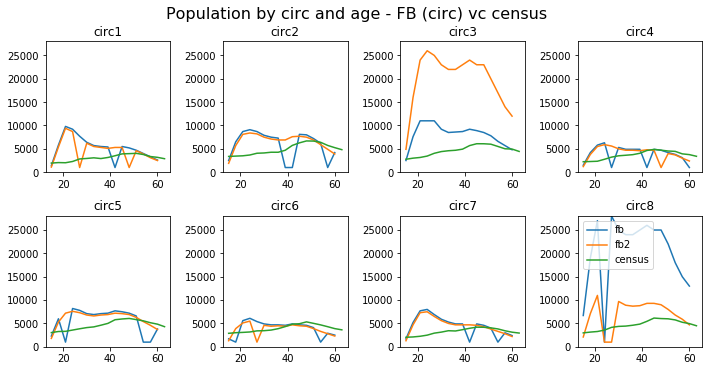

In [1055]:
MAX=max(df_circ_agebins.max().max(), df_census_circ.max().max())
fig,ax=plt.subplots(2,4,figsize=(10,5))
fig.suptitle('Population by circ and age - FB (circ) vc census',fontsize=16,va='bottom')
for col in df_circ_agebins.columns:
    ax[(col-1)//4,(col-1)%4].plot([e[0] for e in df_circ_agebins.index.values],df_circ_agebins[col])
    ax[(col-1)//4,(col-1)%4].plot([e[0] for e in df_circ_agebins2.index.values],df_circ_agebins2[col])
    ax[(col-1)//4,(col-1)%4].plot([e[0] for e in df_census_circ.index.values],df_census_circ[str(col)].values)
    ax[(col-1)//4,(col-1)%4].set_title('circ'+str(col))
    ax[(col-1)//4,(col-1)%4].set_ylim([0, MAX])
plt.legend(['fb','fb2','census'])
plt.tight_layout()
#plt.savefig('Pop_age_fbcirc_vs_censuscirc.pdf')
plt.show()

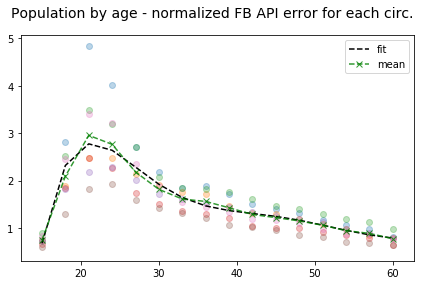

In [1192]:
#MAX=max(df_circ_agebins.max().max(), df_census_circ.max().max())
all_errs=[]
fig,ax=plt.subplots() #figsize=(10,5))
fig.suptitle('Population by age - normalized FB API error for each circ.',fontsize=14)#,va='bottom')
for col in df_circ_agebins.columns[:-1]:
    err=df_circ_agebins_complete[col]/df_census_circ[str(col)][:-1]
    #err=df_census_circ[str(col)][:-1]/df_circ_agebins_complete[col]
    err=err.values
    #N=np.sqrt(sum([e**2 for e in err]))
    #err=[e/N for e in err]
    ax.scatter([e[0] for e in df_circ_agebins.index.values],err,alpha=.3)
    all_errs.append(err)
    #ax[(col-1)//4,(col-1)%4].set_ylim([0, MAX])
z=np.polyfit([e[0] for e in df_circ_agebins.index.values], [np.mean([a[i] for a in all_errs]) for i in range(len(all_errs[0]))],6)
ax.plot([e[0] for e in df_circ_agebins.index.values],np.poly1d(z)([e[0] for e in df_census_circ.index.values][:-1]),'k--',label='fit')
ax.plot([e[0] for e in df_circ_agebins.index.values],[np.mean([a[i] for a in all_errs]) for i in range(len(all_errs[0]))],'gx--',alpha=.8,label='mean')
#ax.plot([15,60],[1,1])
plt.legend()
plt.tight_layout()
plt.subplots_adjust(top=.88)
#plt.savefig('Normerr_fbcirc_vs_censuscirc.pdf')
plt.show()

In [1446]:
df_circ_agebins_complete

,NCIRCO,1,2,3,4,5,6,7,8
15,18,1400,2500,2500,1500,2300,1700,1700,2100
18,21,5800,6500,7600,4200,6000,3900,5200,7100
21,24,9800,8700,11000,5800,7200,5600,7700,11000
24,27,9200,9100,11000,6300,8200,6100,8000,1000
27,30,7700,8700,11000,5600,7800,5400,6900,1000
30,33,6400,7900,9200,5300,7100,4900,5900,9700
33,36,5700,7500,8500,4900,6900,4700,5300,8900
36,39,5500,7300,8600,4900,7100,4700,4900,8700
39,42,5400,6900,8700,4900,7200,4600,4900,8800
42,45,5300,7600,9200,4800,7700,4900,4700,9300


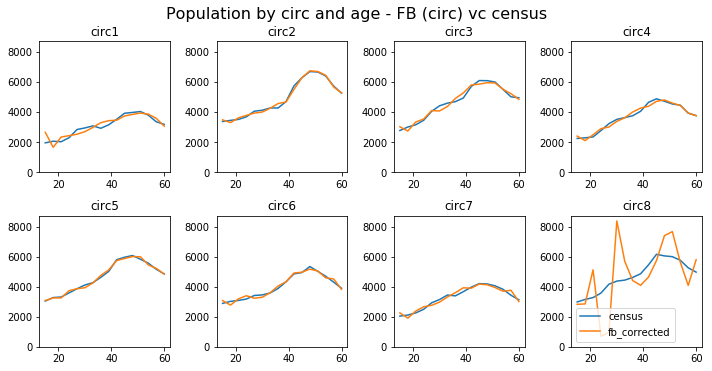

In [1445]:
MAX=max(df_circ_agebins.max().max(), df_census_circ.max().max())
MAX=df_census_circ.max().max()*1.3
fig,ax=plt.subplots(2,4,figsize=(10,5))
fig.suptitle('Population by circ and age - FB (circ) vc census',fontsize=16,va='bottom')
for j,col in enumerate(df_circ_agebins.columns):
    #ax[(col-1)//4,(col-1)%4].plot([e[0] for e in df_circ_agebins_complete.index.values],df_circ_agebins_complete[col])
    ax[(col-1)//4,(col-1)%4].plot([e[0] for e in df_census_circ.index.values],df_census_circ[str(col)].values)
    corrected=df_circ_agebins_complete[col]/np.poly1d(z_array[j])([e[0] for e in df_circ_agebins_complete.index])
    ax[(col-1)//4,(col-1)%4].plot([e[0] for e in corrected.index.values],corrected)    
    ax[(col-1)//4,(col-1)%4].set_title('circ'+str(col))
    ax[(col-1)//4,(col-1)%4].set_ylim([0, MAX])
plt.legend(['census','fb_corrected'])
plt.tight_layout()
#plt.savefig('Pop_age_fbcirc_vs_censuscirc.pdf')
plt.show()

# SINGLE MEN AND WOMEN

In [723]:
#df_circ_single=pd.read_pickle('df_circ_single.pkl')
df_circ_single2=pd.read_pickle('df_circ_single2.pkl')

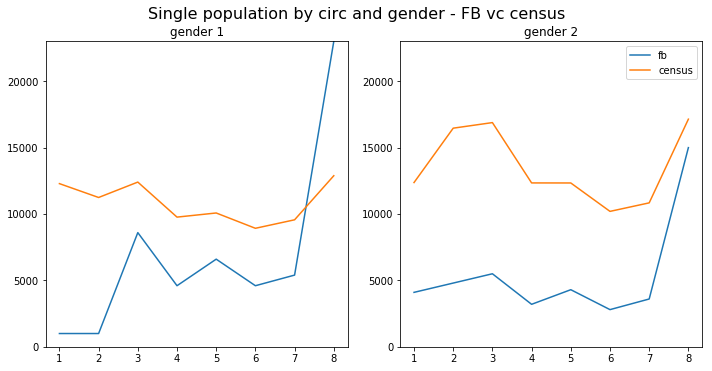

In [693]:
MAX=max(df_circ_single.max().max(), df_census_families[['sol' in str(i) for i in df_census_families.index]].iloc[1//gender].values[:-1].max().max())

fig,ax=plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Single population by circ and gender - FB vc census',fontsize=16,va='bottom')
for gender in df_circ_single.index.values:
    ax[gender-1].plot(df_circ_single.columns,df_circ_single.iloc[gender-1].values)
    ax[gender-1].plot([int(i) for i in df_census_families.columns[:-1]],df_census_families[['sol' in str(i) for i in df_census_families.index]].iloc[1//gender].values[:-1])
    ax[gender-1].set_title('gender '+str(gender))
    ax[gender-1].set_ylim([0,MAX])
plt.legend(['fb','census'])
plt.tight_layout()
plt.savefig('Single_ppl_pergendercirc.pdf')
plt.show()

# Couples with kids

In [690]:
df_circ_parents_gender

NCIRCO,1,2,3,4,5,6,7,8
1,1900,3600,3700,2100,3500,2100,1900,11000
2,2600,4600,4500,2700,4400,1000,1000,14000


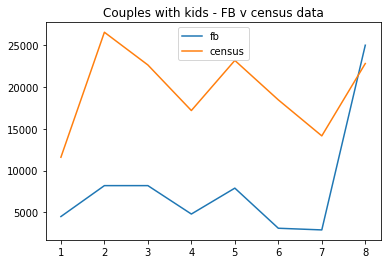

In [691]:
plt.figure()
plt.plot(df_circ_parents_gender.sum().T)
plt.plot([int(i) for i in df_census_families.columns[:-1]],df_census_families[[('Coppie' in d and 'figli' in d) for d in df_census_families.index.fillna('')]].sum()[:-1])
plt.legend(['fb','census'])
plt.title('Couples with kids - FB v census data')
plt.savefig('Couples_wkids.pdf')
plt.show()

# Gender 

In [568]:
df_circ_gender_census.set_index('Circoscrizione ').T.drop('Totale ',axis=1)

Circoscrizione,1,2,3,4,5,6,7,8
Femmine,40684,72047,65839,50755,63844,54214,44586,67511
Maschi,38363,63983,58693,45746,60004,51806,40859,60070
Totale,79047,136030,124532,96501,123848,106020,85445,127581


In [677]:
df_circ_gender

NCIRCO,1,2,3,4,5,6,7,8
1,33000,43000,51000,28000,41000,28000,30000,140000
2,34000,43000,1000,28000,40000,26000,29000,140000


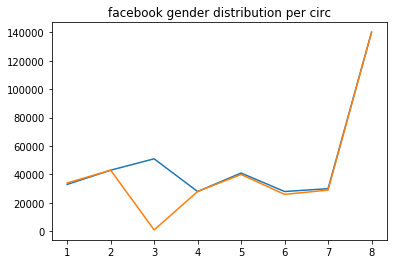

In [678]:
plt.figure()
plt.plot(df_circ_gender.iloc[0])
plt.plot(df_circ_gender.iloc[1])
plt.title('facebook gender distribution per circ')
plt.show()

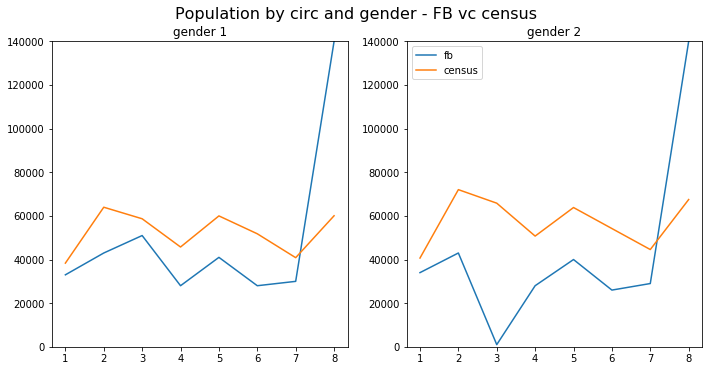

In [683]:
MAX=max(df_circ_gender.max().max(),df_circ_gender_census.set_index('Circoscrizione ').T.drop('Totale ',axis=1).max().max())

fig,ax=plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Population by circ and gender - FB vc census',fontsize=16,va='bottom')
for gender in df_circ_single.index.values:
    ax[gender-1].plot(df_circ_gender.columns,df_circ_gender.iloc[gender-1].values)
    ax[gender-1].plot(df_circ_gender.columns,df_circ_gender_census.set_index('Circoscrizione ').T.drop('Totale ',axis=1).iloc[1//gender])
    ax[gender-1].set_title('gender '+str(gender))
    ax[gender-1].set_ylim([0,MAX])
plt.legend(['fb','census'])
plt.tight_layout()
plt.savefig('Pop_circ_gender.pdf')
plt.show()

In [673]:
df_zip_fb

,married,femsole,mascsole,CAP,geometry,ratio
IT:10121,11000,11000,11000,10121,"POLYGON ((7.684650013280694 45.07057998446517,...","{0: 0.9954719976059636, 1: 0.0, 2: 0.004528002..."
IT:10122,15000,1000,1000,10122,"POLYGON ((7.689670014459174 45.07490998531327,...","{0: 0.972130925308778, 1: 0.0, 2: 0.0010628834..."
IT:10123,13000,1000,1000,10123,"POLYGON ((7.697966534472658 45.06316633967973,...","{0: 0.9422721285639345, 1: 0.0, 2: 0.0, 3: 0.0..."
IT:10124,12000,1000,1000,10124,"POLYGON ((7.708540013757939 45.06747998545737,...","{0: 0.45433618932276815, 1: 0.0, 2: 0.0, 3: 0...."
IT:10125,16000,16000,16000,10125,"POLYGON ((7.687820014616078 45.05951998455264,...","{0: 0.1130719002156945, 1: 0.0, 2: 0.0, 3: 0.0..."
IT:10126,230000,1000,1000,10126,"POLYGON ((7.692880014041051 45.05766998470955,...","{0: 0.010344151603408444, 1: 0.0, 2: 0.0, 3: 0..."
IT:10127,20000,1000,1000,10127,"POLYGON ((7.659610014651189 45.0288099844595, ...","{0: 0.0, 1: 0.362575114572055, 2: 0.0, 3: 0.0,..."
IT:10128,17000,17000,17000,10128,"POLYGON ((7.679052139242606 45.06271530629975,...","{0: 0.9966174698541743, 1: 0.0, 2: 0.003382530..."
IT:10129,17000,1000,1000,10129,"POLYGON ((7.660320014104818 45.05068998401336,...","{0: 0.8514209481852014, 1: 0.06176829786090198..."
IT:10131,6300,1000,6300,10131,"POLYGON ((7.741986684960447 45.04618684838621,...","{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0...."


In [349]:
df_zip_fb['ratio']=df_zip_fb.geometry.apply(lambda x : get_ratio(x,df_circ['geometry'].to_crs(epsg=4326).tolist()))

In [355]:
df_zip_fb

,married,femsole,mascsole,CAP,geometry,ratio
IT:10121,11000,11000,11000,10121,"POLYGON ((7.684650013280694 45.07057998446517,...","{0: 0.9954719976059636, 1: 0.0, 2: 0.004528002..."
IT:10122,15000,1000,1000,10122,"POLYGON ((7.689670014459174 45.07490998531327,...","{0: 0.972130925308778, 1: 0.0, 2: 0.0010628834..."
IT:10123,13000,1000,1000,10123,"POLYGON ((7.697966534472658 45.06316633967973,...","{0: 0.9422721285639345, 1: 0.0, 2: 0.0, 3: 0.0..."
IT:10124,12000,1000,1000,10124,"POLYGON ((7.708540013757939 45.06747998545737,...","{0: 0.45433618932276815, 1: 0.0, 2: 0.0, 3: 0...."
IT:10125,16000,16000,16000,10125,"POLYGON ((7.687820014616078 45.05951998455264,...","{0: 0.1130719002156945, 1: 0.0, 2: 0.0, 3: 0.0..."
IT:10126,230000,1000,1000,10126,"POLYGON ((7.692880014041051 45.05766998470955,...","{0: 0.010344151603408444, 1: 0.0, 2: 0.0, 3: 0..."
IT:10127,20000,1000,1000,10127,"POLYGON ((7.659610014651189 45.0288099844595, ...","{0: 0.0, 1: 0.362575114572055, 2: 0.0, 3: 0.0,..."
IT:10128,17000,17000,17000,10128,"POLYGON ((7.679052139242606 45.06271530629975,...","{0: 0.9966174698541743, 1: 0.0, 2: 0.003382530..."
IT:10129,17000,1000,1000,10129,"POLYGON ((7.660320014104818 45.05068998401336,...","{0: 0.8514209481852014, 1: 0.06176829786090198..."
IT:10131,6300,1000,6300,10131,"POLYGON ((7.741986684960447 45.04618684838621,...","{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0...."


In [358]:
df_single_fb=df_zip_fb[['femsole','ratio']]

In [359]:
df_single_fb

,femsole,ratio
IT:10121,11000,"{0: 0.9954719976059636, 1: 0.0, 2: 0.004528002..."
IT:10122,1000,"{0: 0.972130925308778, 1: 0.0, 2: 0.0010628834..."
IT:10123,1000,"{0: 0.9422721285639345, 1: 0.0, 2: 0.0, 3: 0.0..."
IT:10124,1000,"{0: 0.45433618932276815, 1: 0.0, 2: 0.0, 3: 0...."
IT:10125,16000,"{0: 0.1130719002156945, 1: 0.0, 2: 0.0, 3: 0.0..."
IT:10126,1000,"{0: 0.010344151603408444, 1: 0.0, 2: 0.0, 3: 0..."
IT:10127,1000,"{0: 0.0, 1: 0.362575114572055, 2: 0.0, 3: 0.0,..."
IT:10128,17000,"{0: 0.9966174698541743, 1: 0.0, 2: 0.003382530..."
IT:10129,1000,"{0: 0.8514209481852014, 1: 0.06176829786090198..."
IT:10131,1000,"{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0...."


In [385]:
df_single_fb_circ=pd.DataFrame(index=df_circ.index,columns=['sole'],data=0)

In [386]:
for CAP in df_single_fb.index:
    Nsole=df_single_fb.femsole.loc[CAP]
    prop=df_single_fb.ratio.loc[CAP]
    for i in df_single_fb_circ.index:
        df_single_fb_circ.loc[i]+=Nsole*prop[i-1]

In [397]:
df_zip_fb

,married,femsole,mascsole,CAP,geometry,ratio
IT:10121,11000,11000,11000,10121,"POLYGON ((7.684650013280694 45.07057998446517,...","{0: 0.9954719976059636, 1: 0.0, 2: 0.004528002..."
IT:10122,15000,1000,1000,10122,"POLYGON ((7.689670014459174 45.07490998531327,...","{0: 0.972130925308778, 1: 0.0, 2: 0.0010628834..."
IT:10123,13000,1000,1000,10123,"POLYGON ((7.697966534472658 45.06316633967973,...","{0: 0.9422721285639345, 1: 0.0, 2: 0.0, 3: 0.0..."
IT:10124,12000,1000,1000,10124,"POLYGON ((7.708540013757939 45.06747998545737,...","{0: 0.45433618932276815, 1: 0.0, 2: 0.0, 3: 0...."
IT:10125,16000,16000,16000,10125,"POLYGON ((7.687820014616078 45.05951998455264,...","{0: 0.1130719002156945, 1: 0.0, 2: 0.0, 3: 0.0..."
IT:10126,230000,1000,1000,10126,"POLYGON ((7.692880014041051 45.05766998470955,...","{0: 0.010344151603408444, 1: 0.0, 2: 0.0, 3: 0..."
IT:10127,20000,1000,1000,10127,"POLYGON ((7.659610014651189 45.0288099844595, ...","{0: 0.0, 1: 0.362575114572055, 2: 0.0, 3: 0.0,..."
IT:10128,17000,17000,17000,10128,"POLYGON ((7.679052139242606 45.06271530629975,...","{0: 0.9966174698541743, 1: 0.0, 2: 0.003382530..."
IT:10129,17000,1000,1000,10129,"POLYGON ((7.660320014104818 45.05068998401336,...","{0: 0.8514209481852014, 1: 0.06176829786090198..."
IT:10131,6300,1000,6300,10131,"POLYGON ((7.741986684960447 45.04618684838621,...","{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0...."


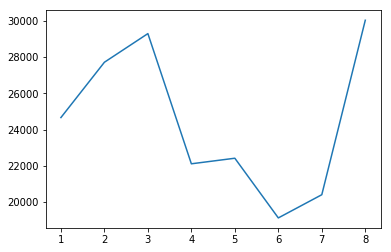

In [390]:
plt.plot(df_census_families[['sol' in str(i) for i in df_census_families.index]].sum()[:-1])

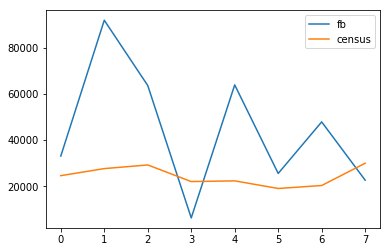

In [396]:
plt.plot(df_single_fb_circ.sole.tolist())
plt.plot(df_census_families[['sol' in str(i) for i in df_census_families.index]].sum()[:-1].tolist())
plt.legend(['fb','census'])

In [383]:
df_single_fb_circ

,sole
NCIRCO,
1,3.313087e+04
2,1.043859e+06
3,6.359110e+04
4,6.410105e+03
5,6.386130e+04
6,2.561647e+04
7,4.788126e+04
8,1.700943e+05


# GENDER BY ZS

In [398]:
# next step: extract gender by ZS -> agglomerate by ZS to form ZIPs -> compare with fb

In [ ]:
#GEOGRAPHY
# df_capcirc : for each CAP, the proportion of its area belonging to every circ
# df_circ : for each circ, the CAPs that overlap with it (but no info on the area)

# CENSUS
# df_cap: CAP dataframe with the geometry (and estimations of population from 2009).
# df_census_families : dataframe from the ufficio de statistica with families typologies
## df_circ_gender_census : pop by gender and circ OK
# df_age_circ : pop by age and by circ

# FB
## df_circ_agebins : pop by age range per circ OK
# df_circ_allparents : all parents per circ OK
## df_circ_gender : pop by gender per circ OK
# df_circ_parents_gender : parents per gender and per circ OK
## df_circ_single : single pop per circ OK
## df_coupleskids_fb : couples with kids per circ OK
# df_fb_circ : inferred population per agebin per circ, from data about zip
# df_agebin_theater : people interested in theater by circoscrizione and agebin
# df_circ_students_gender: Number of students per gender and per circoscrizione
# df_circ_marriedparents_gender : Number of people married who are also parents per circoscrizione
# df_zip_gender_shopping : Number of people per gender and per zip interested in shopping and fashion
# df_circ_agebins_complete: corrected number of people per zip and per age bin

# df_zip_fb : ZIP codes and their geometry, single men and women and married couples per zip (meh)
## df_zip_pop : pop by age range and by ZIP code OK

In [804]:
df_trial_circ=pd.DataFrame(index=df_zip_pop.index ,columns=[i for i in range(1,9)],data=0)

In [805]:
for cap in df_capcirc.set_index('CAP').index:
    cap_to_circ=df_capcirc.set_index('CAP').loc[cap].dict_circ
    for k in cap_to_circ.keys():
        try:
            df_trial_circ[k+1]+=df_zip_pop[cap]*cap_to_circ[k]
        except KeyError:
            pass

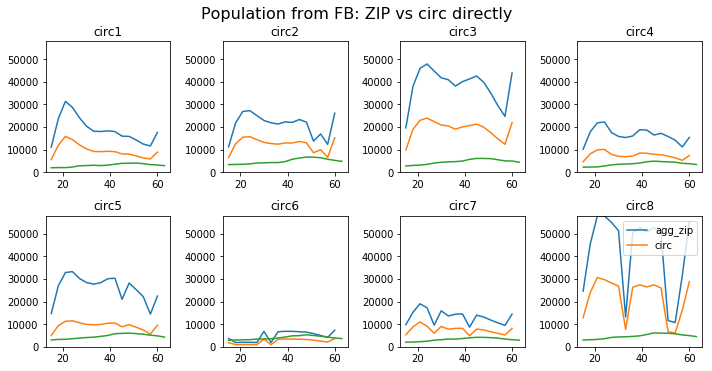

In [1199]:
MAX=max(df_fb_circ.max().max(), df_trial_circ.max().max())
fig,ax=plt.subplots(2,4,figsize=(10,5))
fig.suptitle('Population from FB: ZIP vs circ directly',fontsize=16,va='bottom')
for col in df_circ_agebins.columns:
    ax[(col-1)//4,(col-1)%4].plot([e[0] for e in df_fb_circ.index.values],df_fb_circ[col].values)
    ax[(col-1)//4,(col-1)%4].plot([e[0] for e in df_trial_circ.index.values],df_trial_circ[col].values)
    ax[(col-1)//4,(col-1)%4].plot([e[0] for e in df_census_circ.index.values],df_census_circ[str(col)].values)
    ax[(col-1)//4,(col-1)%4].set_title('circ'+str(col))
    ax[(col-1)//4,(col-1)%4].set_ylim([0, MAX])
plt.legend(['agg_zip','circ'])
plt.tight_layout()
plt.show()

In [1459]:
#Build a dataframe that bins census data
agebins=[(i,i+5) for i in range(15,65,5)]
agebins[-1]=(60,63)
df_census_circ=pd.DataFrame(index=agebins, columns=df_age_circ_ranges.columns)
df_census_circ=df_census_circ.reset_index().drop(['bin','age'],axis=1).rename(columns={'index':'bin'}).fillna(0)
for i,agebin in enumerate(df_census_circ.bin):
    df_census_circ.loc[i]=df_age_circ[[np.all(z) for z in zip(agebin[0]<=df_age_circ.age, df_age_circ.age<agebin[1])]].sum()[:-2]
df_census_circ.bin=agebins
df_census_circ.set_index('bin',inplace=True)

In [1399]:
df_circ_agebin_Shopping=pd.read_pickle('df_circ_agebin_Shopping.pkl')
df_circ_agebin_Entertainment=pd.read_pickle('df_circ_agebin_Entertainment.pkl')
df_circ_agebin_Fitness=pd.read_pickle('df_circ_agebin_Fitness.pkl')
df_circ_agebin_Technology=pd.read_pickle('df_circ_agebin_Technology.pkl')
df_circ_agebin_Business=pd.read_pickle('df_circ_agebin_Business.pkl')
df_circ_agebin_Sports=pd.read_pickle('df_circ_agebin_Sports.pkl')
df_circ_agebin_Food=pd.read_pickle('df_circ_agebin_Food.pkl')
df_circ_agebin_Hobbies=pd.read_pickle('df_circ_agebin_Hobbies.pkl')
df_circ_agebin_Family=pd.read_pickle('df_circ_agebin_Family.pkl')

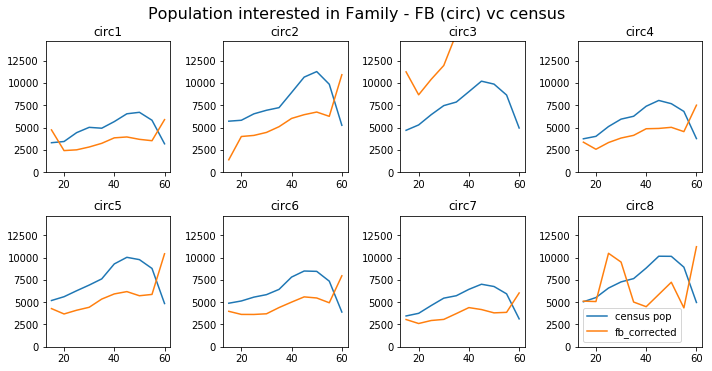

In [1460]:
#Beware that the census and facebook datasets have the same age bins as index!

interest='Family'
df_circ_agebin_interest=pd.read_pickle('df_circ_agebin_{}.pkl'.format(interest))
MAX=max(df_circ_agebin_interest.max().max(), df_census_circ.max().max())
MAX=df_census_circ.max().max()*1.3
fig,ax=plt.subplots(2,4,figsize=(10,5))
fig.suptitle('Population interested in {} - FB (circ) vc census'.format(interest),fontsize=16,va='bottom')
for j,col in enumerate(df_circ_agebin_interest.columns):
    #ax[(col-1)//4,(col-1)%4].plot([e[0] for e in df_circ_agebins_complete.index.values],df_circ_agebins_complete[col])
    ax[(col-1)//4,(col-1)%4].plot([e[0] for e in df_census_circ.index.values],df_census_circ[str(col)].values)
    corrected=df_circ_agebin_interest[col]/np.poly1d(z_array[j])([e[0] for e in df_circ_agebin_interest.index])
    ax[(col-1)//4,(col-1)%4].plot([e[0] for e in corrected.index.values],corrected)
    ax[(col-1)//4,(col-1)%4].set_title('circ'+str(col))
    ax[(col-1)//4,(col-1)%4].set_ylim([0, MAX])
plt.legend(['census pop','fb_corrected'])
plt.tight_layout()
plt.savefig('Pop_age_fbcirc_vs_censuscirc_{}.pdf'.format(interest))
plt.show()

# Array of corrections

In [1447]:
#Build a dataframe that bins census data
gap=3
agebins=[(i,i+gap) for i in range(15,65,gap)]
agebins[-1]=(60,63)
df_census_circ=pd.DataFrame(index=agebins, columns=df_age_circ_ranges.columns)
df_census_circ=df_census_circ.reset_index().drop(['bin','age'],axis=1).rename(columns={'index':'bin'}).fillna(0)
for i,agebin in enumerate(df_census_circ.bin):
    df_census_circ.loc[i]=df_age_circ[[np.all(z) for z in zip(agebin[0]<=df_age_circ.age, df_age_circ.age<agebin[1])]].sum()[:-2]
df_census_circ.bin=agebins
df_census_circ.set_index('bin',inplace=True)

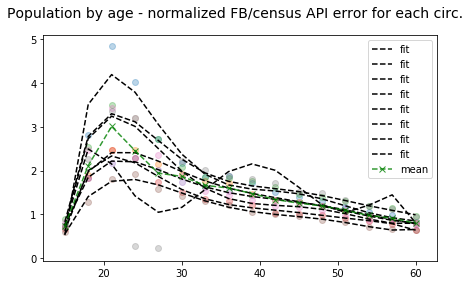

In [1455]:
#MAX=max(df_circ_agebins.max().max(), df_census_circ.max().max())
all_errs=[]
fig,ax=plt.subplots() #figsize=(10,5))
fig.suptitle('Population by age - normalized FB/census API error for each circ.',fontsize=14)#,va='bottom')
for col in df_circ_agebins.columns:
    err=df_circ_agebins_complete[col]/df_census_circ[str(col)][:-1]
    #err=df_census_circ[str(col)][:-1]/df_circ_agebins_complete[col]
    err=err.values
    #N=np.sqrt(sum([e**2 for e in err]))
    #err=[e/N for e in err]
    ax.scatter([e[0] for e in df_circ_agebins.index.values],err,alpha=.3)
    all_errs.append(err)
    #ax[(col-1)//4,(col-1)%4].set_ylim([0, MAX])
z_array=[np.polyfit([e[0] for e in df_circ_agebins.index.values],a,6) for a in all_errs]
for z in z_array:
    ax.plot([e[0] for e in df_circ_agebins.index.values],np.poly1d(z)([e[0] for e in df_census_circ.index.values][:-1]),'k--',label='fit')
ax.plot([e[0] for e in df_circ_agebins.index.values],[np.mean([a[i] for a in all_errs]) for i in range(len(all_errs[0]))],'gx--',alpha=.8,label='mean')
#ax.plot([15,60],[1,1])
plt.legend()
plt.tight_layout()
plt.subplots_adjust(top=.88)
#plt.savefig('Normerr_fbcirc_vs_censuscirc.pdf')
plt.show()

# Divers

In [ ]:
# How to build the agebins complete from the rigged other dataframes
df_circ_agebins_complete=pd.DataFrame(index=df_circ_agebins.index, columns=df_circ_agebins.columns)
for col in df_circ_agebins_complete.columns:
    for i in df_circ_agebins_complete.index:
        if df_circ_agebins[col].loc[i]!=1000:
            df_circ_agebins_complete[col].loc[i]=df_circ_agebins[col].loc[i]
        else:
            df_circ_agebins_complete[col].loc[i]=df_circ_agebins2[col].loc[i]
df_circ_agebins_complete[3]=df_circ_agebins[3]
df_circ_agebins_complete[8]=df_circ_agebins2[8]